In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a DataFrame with your data
# dependent_varible = no of accidents(y)
# independent_variable(factors that influence accident severity) = "Injuries (X1)," "Deaths (X2)," "2W (X3)," and "Car (X4).
data = {
    'No of Accidents (Y)': [46, 44, 24, 48, 51, 40, 38, 28, 28, 31, 25, 33],
    'Injuries (X1)': [25, 20, 11, 27, 37, 17, 27, 20, 19, 22, 12, 30],
    'Deaths (X2)': [6, 3, 9, 12, 3, 6, 3, 2, 1, 2, 3, 3],
    '2W (X3)': [22, 28, 6, 25, 24, 18, 20, 15, 24, 19, 10, 22],
    'Car (X4)': [12, 9, 6, 9, 10, 12, 8, 11, 9, 5, 9, 15]
}

df = pd.DataFrame(data)




In [3]:
# Define the coefficients
a0 = 43.60122582
a1 = 0.010192044
a2 = 7.23865e-13
a3 = 0.008516712
a4 = 3.26086e-07

# Calculate the predicted values Yg
df['Predicted (Yg)'] = a0 + a1 * df['Injuries (X1)'] ** 2 + a2 * df['Deaths (X2)'] ** 2 + a3 * df['2W (X3)'] ** 2 + a4 * df['Car (X4)'] ** 2


In [4]:
# Calculate SSR (Sum of Squares of Regression) and SSE (Sum of Squares of Error)
SST = ((df['No of Accidents (Y)'] - df['No of Accidents (Y)'].mean()) ** 2).sum()
SSR = ((df['Predicted (Yg)'] - df['No of Accidents (Y)'].mean()) ** 2).sum()
SSE = ((df['No of Accidents (Y)'] - df['Predicted (Yg)']) ** 2).sum()

# Calculate R^2
R_squared = SSR / SST

In [5]:
# Print the results
print(f'Sum of Squares of Regression (SSR): {SSR}')
print(f'Sum of Squares of Error (SSE): {SSE}')
print(f'Total Sum of Squares (SST): {SST}')
print(f'Coefficient of Determination (R^2): {R_squared}')

Sum of Squares of Regression (SSR): 3472.534052337234
Sum of Squares of Error (SSE): 3662.3155138210495
Total Sum of Squares (SST): 978.6666666666665
Coefficient of Determination (R^2): 3.548229617510798


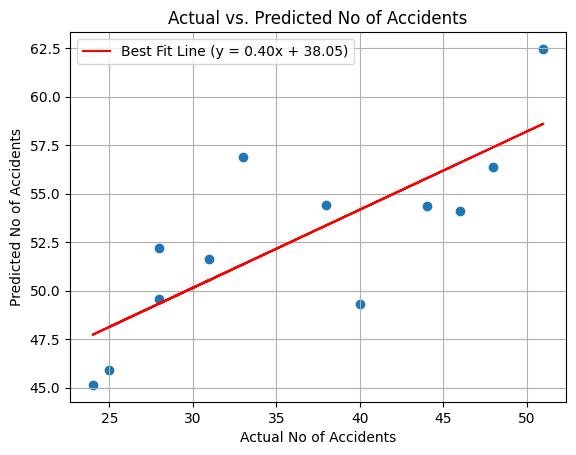

In [6]:
# Visualize the results
plt.scatter(df['No of Accidents (Y)'], df['Predicted (Yg)'])
plt.xlabel('Actual No of Accidents')
plt.ylabel('Predicted No of Accidents')
plt.title('Actual vs. Predicted No of Accidents')

# Calculate and plot the best-fit line
m, b = np.polyfit(df['No of Accidents (Y)'], df['Predicted (Yg)'], 1)
plt.plot(df['No of Accidents (Y)'], m * df['No of Accidents (Y)'] + b, color='red', label=f'Best Fit Line (y = {m:.2f}x + {b:.2f})')


plt.legend()
plt.grid()
plt.show()

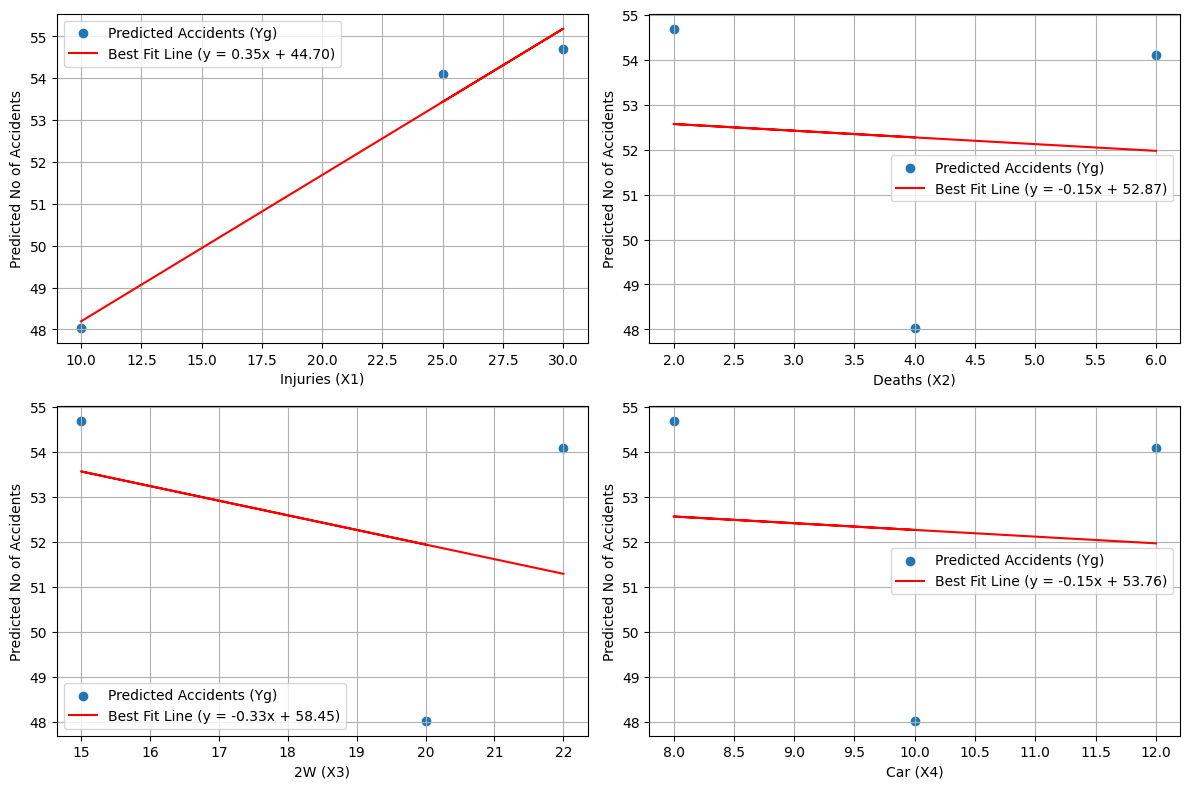

In [7]:
# MAKE PREDICTIONS AND VISUALIZE
# Hypothetical data
hypothetical_data = {
    'Injuries (X1)': [25, 30, 10],  # Modify these values as needed
    'Deaths (X2)': [6, 2, 4],      # Modify these values as needed
    '2W (X3)': [22, 15, 20],      # Modify these values as needed
    'Car (X4)': [12, 8, 10]       # Modify these values as needed
}

hypothetical_df = pd.DataFrame(hypothetical_data)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Calculate and plot best-fit lines for each variable
for i, var in enumerate(hypothetical_df.columns):
    m, b = np.polyfit(hypothetical_df[var], a0 + a1 * hypothetical_df['Injuries (X1)'] ** 2 + a2 * hypothetical_df['Deaths (X2)'] ** 2 + a3 * hypothetical_df['2W (X3)'] ** 2 + a4 * hypothetical_df['Car (X4)'] ** 2, 1)
    axs[i // 2, i % 2].scatter(hypothetical_df[var], a0 + a1 * hypothetical_df['Injuries (X1)'] ** 2 + a2 * hypothetical_df['Deaths (X2)'] ** 2 + a3 * hypothetical_df['2W (X3)'] ** 2 + a4 * hypothetical_df['Car (X4)'] ** 2, label=f'Predicted Accidents (Yg)')
    axs[i // 2, i % 2].set_xlabel(var)
    axs[i // 2, i % 2].set_ylabel('Predicted No of Accidents')
    axs[i // 2, i % 2].plot(hypothetical_df[var], m * hypothetical_df[var] + b, color='red', label=f'Best Fit Line (y = {m:.2f}x + {b:.2f})')
    axs[i // 2, i % 2].legend()
    axs[i // 2, i % 2].grid()

plt.tight_layout()
plt.show()


